In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [5]:
inventory = pd.read_excel('../data/inventory.xlsx')
master_site = pd.read_excel('../data/master_site.xlsx')
master_sku = pd.read_excel('../data/master_sku.xlsx')
order = pd.read_csv('../data/order.csv')
receive = pd.read_csv('../data/receive.csv')
sales = pd.read_csv('../data/sales.csv')

we found that the art_no column in the order.csv and receive.csv tables corresponds to the sku_no column in the sales.csv table, so we rename the art_no column in the order and receive tables to sku_no (2)ชื่อไม่ตรง

In [6]:
order["art_no"].unique()

array([7, 2, 0, 8, 5, 4, 3, 9, 6, 1])

In [7]:
receive["ArtNo"].unique()

array([0, 6, 4, 3, 7, 2, 9, 8, 5, 1])

In [8]:
sales["sku_no"].unique()

array([5, 6, 3, 2, 7, 8, 9, 4, 0, 1])

In [9]:
order.rename(columns={'art_no': 'sku_no'}, inplace=True)

In [10]:
receive.rename(columns={'ArtNo': 'sku_no'}, inplace=True)

Site_a, Site_b, and Site_d have an ord_amt (order value) of 0, although there have sale qty. In contrast, Site_c and Site_e have substantial order values: 1818660.6 and 178551.3 respectively, suggesting that these sites are generating significant sales and revenue. (2 table 1 point)

In [13]:
merged_site = pd.merge(order, master_site, on='site_no', how='inner')
merged_site.head()

,date_order,ord_no,ord_issue_by,site_no,sku_no,order_qty,orderv_amt,site_name,lat,long
0,2021-12-01,ORD000359,นายสมชาย แซ่ลิ้ม,2,7,69.0,3450.0,site_c,13.847929,100.545001
1,2021-12-01,ORD000359,นายสมชาย แซ่ลิ้ม,2,2,46.0,1518.0,site_c,13.847929,100.545001
2,2021-12-01,ORD000359,นายสมชาย แซ่ลิ้ม,2,0,69.0,1518.0,site_c,13.847929,100.545001
3,2021-12-01,ORD000357,นางสาววรรณา พิพัฒน์วงศ์,3,8,20.7,0.0,site_d,13.608499,100.561048
4,2021-12-02,ORD000429,นายสมชาย แซ่ลิ้ม,2,2,46.0,1518.0,site_c,13.847929,100.545001


In [14]:
merged_site.groupby(['site_name','lat','long'])['orderv_amt'].sum()

site_name  lat        long      
site_a     13.861617  100.455124          0.0
site_b     13.647672  100.870988          0.0
site_c     13.847929  100.545001    1818660.6
site_d     13.608499  100.561048          0.0
site_e     13.919113  100.578260     178551.3
Name: orderv_amt, dtype: float64

order สั่งสินค่าแล้วแต่ ราคารวมเป็น 0 แก้โดย ไม่เลือก(0.5)

In [41]:
order[order['orderv_amt']<=0]

,date_order,ord_no,ord_issue_by,site_no,sku_no,order_qty,orderv_amt
3,2021-12-01,ORD000357,นางสาววรรณา พิพัฒน์วงศ์,3,8,20.70,0.0
6,2021-12-01,ORD000349,นางสาววรรณา พิพัฒน์วงศ์,3,4,17.25,0.0
7,2021-12-01,ORD000358,นางสาววรรณา พิพัฒน์วงศ์,1,2,23.00,0.0
8,2021-12-01,ORD000350,นางสาววรรณา พิพัฒน์วงศ์,1,4,34.50,0.0
10,2021-12-01,ORD000351,นางสาววรรณา พิพัฒน์วงศ์,4,4,17.25,0.0
...,...,...,...,...,...,...,...
20356,2023-12-29,ORD011713,นางสาวอภิชาติ วงศ์สุนทร,2,6,6.90,0.0
20357,2023-12-29,ORD011715,นางสาวอภิชาติ วงศ์สุนทร,3,6,13.80,0.0
20358,2023-12-29,ORD011716,นางสาวอภิชาติ วงศ์สุนทร,0,6,13.80,0.0
20359,2023-12-29,ORD011717,นางสาวอภิชาติ วงศ์สุนทร,1,6,6.90,0.0


In [42]:
order = order[order['orderv_amt']>0]

In [43]:
order

,date_order,ord_no,ord_issue_by,site_no,sku_no,order_qty,orderv_amt
0,2021-12-01,ORD000359,นายสมชาย แซ่ลิ้ม,2,7,69.00,3450.0
1,2021-12-01,ORD000359,นายสมชาย แซ่ลิ้ม,2,2,46.00,1518.0
2,2021-12-01,ORD000359,นายสมชาย แซ่ลิ้ม,2,0,69.00,1518.0
4,2021-12-02,ORD000429,นายสมชาย แซ่ลิ้ม,2,2,46.00,1518.0
5,2021-12-02,ORD000429,นายสมชาย แซ่ลิ้ม,2,5,34.50,2242.5
...,...,...,...,...,...,...,...
20198,2023-12-29,ORD011684,นายสมชาย แซ่ลิ้ม,2,4,69.00,1794.0
20200,2023-12-29,ORD011684,นายสมชาย แซ่ลิ้ม,2,2,115.00,4600.0
20202,2023-12-29,ORD011684,นายสมชาย แซ่ลิ้ม,2,7,119.60,4305.6
20203,2023-12-29,ORD011684,นายสมชาย แซ่ลิ้ม,2,0,124.20,2856.6


In [44]:
recieve = pd.read_csv('../data/receive.csv')

แก้ชื่อไม่ตรง(0.5)

In [45]:
recieve = recieve.rename(columns={'DateRcv':'date_rcv','SiteNo':'site_no','ArtNo':'sku_no','ReceiveVamt':'receive_vamt','ReceiveQty':'receive_qty'})

recieve.drop(columns=['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'])

,date_rcv,site_no,sku_no,receive_vamt,receive_qty
0,12/1/2022,1,0,207.8855,12
1,12/1/2022,1,6,227.7000,7
2,12/1/2022,3,4,396.7500,17
3,12/1/2022,3,3,246.1000,23
4,12/1/2022,3,7,763.9220,23
...,...,...,...,...,...
18374,26/8/2023,3,0,808.0038,41
18375,26/8/2023,3,9,408.3075,12
18376,26/8/2023,3,9,816.6150,23
18377,26/8/2023,3,6,3450.0000,69


In [46]:
sales = pd.read_csv('../data/sales.csv')


In [47]:
sales['format_date'] = pd.to_datetime(sales['trans_date'],format="mixed")
sales['month_year'] = sales['format_date'].dt.strftime('%Y-%m')
sales.drop(columns=['trans_date','format_date','Unnamed: 9'])

,site_no,sku_no,inv_no,customer_id,sale_qty,salev_amt,disc_amt,promo_type,month_year
0,2,5,INV239155,NaN,0.5773,51.7500,0.0,N,2022-01
1,3,6,INV149326,CUS044771,1.1500,44.8500,0.0,N,2022-01
2,0,3,INV291207,CUS000018,1.1500,16.1000,0.0,N,2022-01
3,1,6,INV014672,CUS000002,1.1500,44.8500,0.0,N,2022-01
4,4,2,INV243251,CUS000018,0.6279,24.4375,0.0,N,2022-01
...,...,...,...,...,...,...,...,...,...
375720,2,0,INV131658,CUS008019,1.0948,31.6250,0.0,N,2023-12
375721,2,3,INV166135,CUS032170,1.1500,16.1000,0.0,N,2023-12
375722,2,3,INV069520,CUS000014,1.1500,16.1000,0.0,N,2023-12
375723,1,4,INV190427,NaN,4.8323,188.3125,0.0,N,2023-12


sales_qty, disc_amt และ salev_amt แติดลบ แก้ด้วย abs(0.5)

In [48]:
sales[sales['sale_qty']<0]

,trans_date,site_no,sku_no,inv_no,customer_id,sale_qty,salev_amt,disc_amt,promo_type,Unnamed: 9,format_date,month_year
968,2/1/2022,4,3,INV320287,CUS000002,-1.1500,-16.1000,0.00,N,NaN,2022-02-01,2022-02
3996,7/1/2022,3,9,INV320255,CUS045088,-1.1500,-21.6775,-2.15,N,NaN,2022-07-01,2022-07
7619,13/1/2022,2,6,INV320340,CUS000002,-1.1500,-44.8500,0.00,N,NaN,2022-01-13,2022-01
12703,23/1/2022,2,7,INV320341,CUS000011,-0.9568,-33.3500,0.00,N,NaN,2022-01-23,2022-01
23948,15/2/2022,3,3,INV320256,CUS000002,-1.1500,-11.5000,0.00,N,NaN,2022-02-15,2022-02
...,...,...,...,...,...,...,...,...,...,...,...,...
366097,12/12/2023,4,5,INV320335,CUS051145,-0.2139,-18.1125,0.00,N,NaN,2023-12-12,2023-12
368619,18/12/2023,3,2,INV320276,CUS000002,-0.6279,-28.1750,0.00,N,NaN,2023-12-18,2023-12
369328,19/12/2023,4,5,INV320336,CUS000002,-0.3358,-28.4625,0.00,N,NaN,2023-12-19,2023-12
372012,25/12/2023,2,4,INV320254,CUS046040,-0.7567,-29.3250,0.00,N,NaN,2023-12-25,2023-12


In [49]:
sales[['sale_qty', 'salev_amt', 'disc_amt']] = sales[['sale_qty', 'salev_amt', 'disc_amt']].abs()


In [50]:
sales['price'] = sales['salev_amt'] - sales['disc_amt']

In [51]:
monthly_sales = sales.groupby('month_year')['price'].sum().reset_index()

ช่วงเดือน 12 2012 มียอดขายมากที่สุด (0.5)

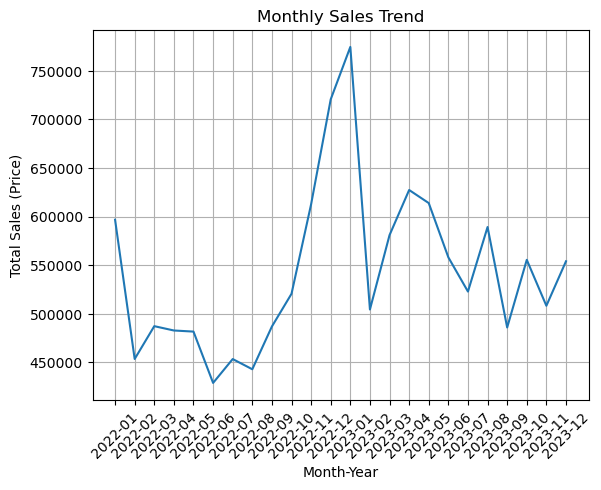

In [52]:

plt.plot(monthly_sales['month_year'], monthly_sales['price'])

# Formatting
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (Price)')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

plot graph from site_no and total_sale_value (0.5)

In [11]:
sales_grouped = sales.groupby(['site_no', 'sku_no']).agg(
    total_sale_qty=('sale_qty', 'sum'),
    total_sale_value=('salev_amt', 'sum'),
    total_disc_amt=('disc_amt', 'sum')
).reset_index()

/var/folders/fx/6drgj1ps7xb2z0cc4_fpc9gw0000gn/T/ipykernel_23264/125832578.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_grouped, x='site_no', y='total_sale_value', palette='viridis', ax=ax)


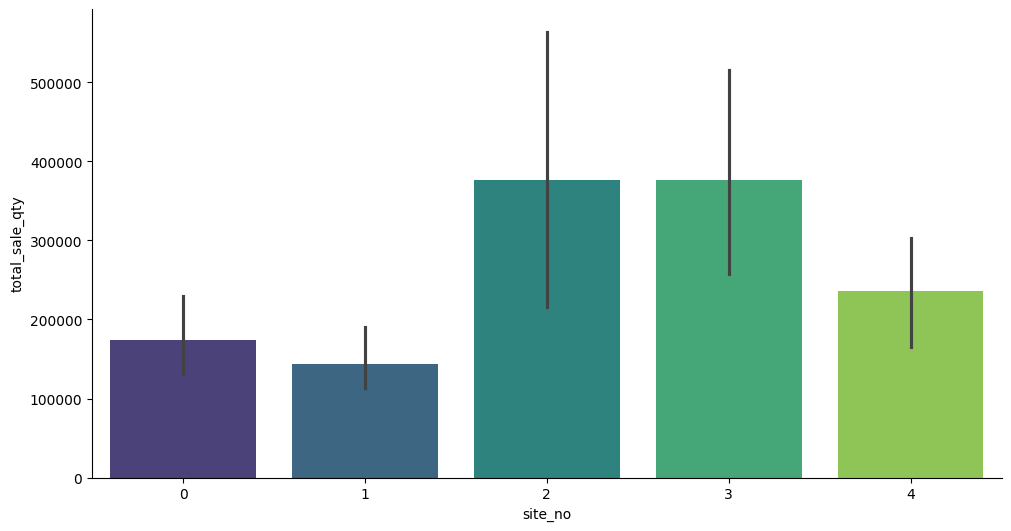

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for total sale quantity by site_no
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

sns.barplot(data=sales_grouped, x='site_no', y='total_sale_value', palette='viridis', ax=ax)

sns.despine(fig=fig, ax=ax)
plt.xlabel('site_no')
plt.ylabel('total_sale_qty')

plt.show()